In [2]:
import datetime
import matplotlib #?
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
metadata_file = '/Users/jaspermeijering/Google Drive/a Study/EPA Study Abroad - Carnegie Mellon University/Courses/CMU - 95845 - Applied Analytics The Machine Learning Pipeline/Machine Learning Pipeline Final Project/Data/FalseNews_Code_Data/data/metadata_anon.txt'


In [4]:
# Read meta data 
fin = open(metadata_file,'r')
lines = fin.readlines()
fin.close()
cascade_id2metadata={}
for line in lines:
    line = line.replace('\n','')
    item = eval(line)
    cascade_id2metadata[item[0]] = item[1]

In [5]:
veracity_all_cascades = []
veracity_shared_cascades = []
for cascade,metadata in cascade_id2metadata.items():
    veracity_all_cascades.append(metadata['veracity']+'_all')
    if metadata['virality'] is not None: 
        veracity_shared_cascades.append(metadata['veracity']+'_shared')
  

In [6]:
l = [[x,veracity_all_cascades.count(x)/len(veracity_all_cascades)] for x in set(veracity_all_cascades)] \
+ [[x,veracity_shared_cascades.count(x)/len(veracity_shared_cascades)] for x in set(veracity_shared_cascades)]
#change order
ll = l[2],l[5],l[1],l[4],l[0],l[3]
ll

(['FALSE_all', 0.6540328263434178],
 ['MIXED_shared', 0.09681328865758894],
 ['MIXED_all', 0.1527066294011924],
 ['TRUE_shared', 0.146122953351869],
 ['TRUE_all', 0.1932605442553899],
 ['FALSE_shared', 0.757063757990542])

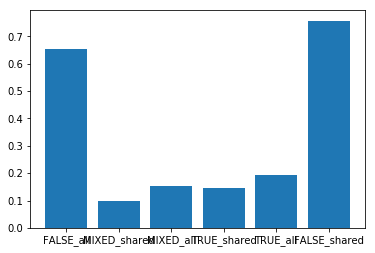

In [7]:
freequency = []
words = []

for line in ll:
    freequency.append(line[1])
    words.append(line[0])

x_axis = np.arange(1, len(words) + 1, 1)

plt.bar(x_axis, freequency, align='center')
plt.xticks(x_axis, words)
plt.figure(figsize=(8, 4))
plt.show()

In [8]:
print("Delting the single item cascades decresed the sample size from",len(veracity_all_cascades),"to", len(veracity_shared_cascades), \
     "the number of cascades in the mixed news group was",veracity_shared_cascades.count('MIXED_shared'), \
     ". Also, the plot shows that the distribution of shared true, false and mixed news items is comparable. \
Therefore we assume that decressed sample is still representative.")

Delting the single item cascades decresed the sample size from 126301 to 42081 the number of cascades in the mixed news group was 4074 . Also, the plot shows that the distribution of shared true, false and mixed news items is comparable. Therefore we assume that decressed sample is still representative.


In [9]:
cid = []
veracity = []
virality = []
depth = []
breadth = []
size = []
verified = []
nfollowers = []
nfollowees = []
engagement = []
category = []
for cascade,metadata in cascade_id2metadata.items():
    if metadata['virality'] is not None: 
        cid.append(cascade)
        veracity.append(metadata['veracity'])
        virality.append(metadata['virality'])
        depth.append(metadata['depth'])
        breadth.append(metadata['max_breadth'])
        size.append(metadata['size'])
        verified.append(metadata['verified_list'][0])
        nfollowers.append(metadata['num_followers_list'][0])
        nfollowees.append(metadata['num_followees_list'][0])
        engagement.append(metadata['engagement_list'][0])
        category.append(metadata['rumor_category'])

# Convert to data frame
static = pd.DataFrame({'cid': cid,
                       'veracity': veracity,
                       'virality': virality,
                       'depth': depth,
                       'breadth': breadth,
                       'size': size,
                       'verified': verified,
                       'nfollowers': nfollowers,
                       'nfollowees': nfollowees,
                       'engangement': engagement,
                       'category': category})

# Inspect
#static.head(5)

In [10]:
static.loc[:,['breadth','depth','engangement','nfollowees','nfollowers','size']].describe().round(1)

,breadth,depth,engangement,nfollowees,nfollowers,size
count,42081.0,42081.0,42081.0,41945.0,41945.0,42081.0
mean,59.4,1.7,77.6,7286.3,58977.0,93.9
std,527.5,1.3,121.2,20474.5,598092.8,950.7
min,2.0,1.0,0.0,0.0,0.0,2.0
25%,2.0,1.0,6.1,468.0,673.0,2.0
50%,3.0,1.0,21.6,1645.0,2820.0,4.0
75%,8.0,2.0,80.3,7289.0,19417.0,9.0
max,29527.0,24.0,1248.3,1303465.0,55776569.0,46895.0


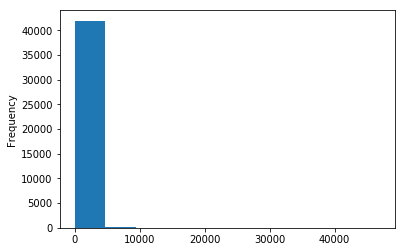

In [17]:
#not so insightfull (occurency of size)
size_plot = static.loc[:,'size'].plot(kind='hist') # strange log scale doesn't work
plt.show()

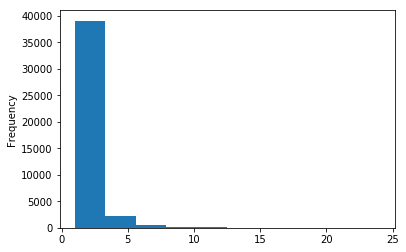

In [18]:
depth_plot = static.loc[:,'depth'].plot(kind='hist')
plt.show()

In [ ]:
len_depth2time = []
len_num_followees_list = []
len_depth2uu = []
len_uu2time = []
len_depth2breadth = []
for cascade,metadata in cascade_id2metadata.items():
    if metadata['virality'] is not None: 
        len_depth2time.append(len(metadata['depth2time'].keys()))
        len_num_followees_list.append(len(metadata['num_followees_list']))
        len_depth2uu.append(len(metadata['depth2uu'].keys()))
        len_uu2time.append(len(metadata['uu2time'].keys()))
        len_depth2breadth.append(len(metadata['depth2breadth'].keys()))
    
# Convert to data frame
dynamic_len = pd.DataFrame({'depth2time ': len_depth2time, 
                           'num_followees_list': len_num_followees_list, 
                           'depth2uu': len_depth2uu, 
                           'uu2time': len_uu2time, 
                           'depth2breadth': len_depth2breadth})

# # Get summary
dynamic_len.describe(percentiles = [0.25, 0.5, 0.75, 1]).round()

# Junk / Notes

In [ ]:
fig = plt.figure(figsize=(8, 4))


In [ ]:
for i in range(len(l)):
    l
          print(i)

In [ ]:
l = [[x,veracity_all_cascades.count(x)/len(veracity_all_cascades)] for x in set(veracity_all_cascades)] \
+ [[x,veracity_shared_cascades.count(x)/len(veracity_shared_cascades)] for x in set(veracity_shared_cascades)]

l


In [ ]:
type(l)

In [ ]:
import numpy as np

In [ ]:
freequency = []
words = []

for line in l:
    freequency.append(line[1])
    words.append(line[0])

x_axis = np.arange(1, len(words) + 1, 1)

plt.bar(x_axis, freequency, align='center')
plt.xticks(x_axis, words)
plt.show()

In [ ]:
matplotlib.pyplot.hist(l)

plt.show()

In [ ]:
l  = [[x,veracity_all_cascades.count(x)/len(veracity_all_cascades)] for x in set(veracity_all_cascades)]

l

In [ ]:
ll = [[x,veracity_shared_cascades.count(x)/len(veracity_shared_cascades)] for x in set(veracity_shared_cascades)]
ll

In [ ]:
lll = ll + l
lll

In [ ]:
veracity_all_cascades.count("FALSE_all") / len(veracity_all_cascades)
#veracity_all_cascades.count("TRUE_all") / len(veracity_all_cascades) 
#veracity_all_cascades.count("MIXED_all") / len(veracity_all_cascades)
veracity_shared_cascades.count("FALSE_shared") / len(veracity_shared_cascades)
#veracity_shared_cascades.count("TRUE_shared") / len(veracity_shared_cascades) 
#veracity_shared_cascades.count("MIXED_shared") / len(veracity_shared_cascades) 

In [ ]:
matplotlib.pyplot.hist(veracity_all_cascades + veracity_shared_cascades)
#matplotlib.pyplot.hist(veracity_shared_cascades)
plt.show()


In [ ]:
matplotlib.pyplot.hist(veracity_all_cascades + veracity_shared_cascades, color = ['red','pink','red','pink','red','pink'])
plt.show()


In [ ]:
import pylab as plt
#import mathplotlib
#import plotly
#import plotly.plotly as py

list(Counter(veracity_all_cascades).items())
list(Counter(veracity_shared_cascades ).items())







In [ ]:
#veracity_all_cascades

In [ ]:
veracity_all_cascades.count('FALSE')

In [ ]:
from collections import Counter
z = veracity_all_cascades
# = Counter(z)
list(Counter(z).items())
#[('5', 3), ('4', 1)]
#count["FALSE"]
#type(count)

In [ ]:
[x,veracity_all_cascades.count(x)] for x in set(veracity_all_cascades)]